# <center>TMVA  Cross Validation Example</center>

#### Example of training TMVA using Cross Validation with ROOT

## Data, Factory and Loader

In [1]:
TMVA::Tools::Instance();

// Provide input file
auto outputFile = TFile::Open("TMVA_ClassificationOutput.root", "RECREATE");

// Declare Factory class
TMVA::Factory factory("TMVAClassification", outputFile,
                      "!V:ROC:!Silent:Color:!DrawProgressBar:AnalysisType=Classification" ); 

// Define input dataset
TString inputFileNameS = "RSG_C10_M500.root";
TString inputFileNameB = "ZtautauB_221.root";
TString inputFileNameC = "ZtautauC_221.root";
TString inputFileNameL = "ZtautauL_221.root";

auto inputFileS = TFile::Open( inputFileNameS );
auto inputFileB = TFile::Open( inputFileNameB );
auto inputFileC = TFile::Open( inputFileNameC );
auto inputFileL = TFile::Open( inputFileNameL );


// --- Register the training and test trees
TTree *signalTree     = (TTree*)inputFileS->Get("Nominal");
TTree *backgroundTreeB = (TTree*)inputFileB->Get("Nominal");
TTree *backgroundTreeC = (TTree*)inputFileC->Get("Nominal");
TTree *backgroundTreeL = (TTree*)inputFileL->Get("Nominal");

// Create dataloader class
TMVA::DataLoader* loader = new TMVA::DataLoader("dataset");

// global event weights per tree (see below for setting event-wise weights)
Double_t signalWeight     = 1.0;
Double_t backgroundWeight = 1.0;
   
// You can add an arbitrary number of signal or background trees
loader->AddSignalTree    ( signalTree,     signalWeight     );
loader->AddBackgroundTree( backgroundTreeB, backgroundWeight );
loader->AddBackgroundTree( backgroundTreeC, backgroundWeight );
loader->AddBackgroundTree( backgroundTreeL, backgroundWeight );

// Define data variables or characteristics
loader->AddVariable( "EventWeight", "EventWeight", "units", 'F' );
loader->AddVariable( "EventNumber", "EventNumber", "units", 'l' );
loader->AddVariable( "NJets", "NJets", "units", 'I' );
loader->AddVariable( "NJetsbtagged", "NJetsbtagged", "units", 'I' );
loader->AddVariable( "Tau1Pt", "Tau1Pt", "units", 'F' );
loader->AddVariable( "Tau1Eta", "Tau1Eta", "units", 'F' );
loader->AddVariable( "Tau1Phi", "Tau1Phi", "units", 'F' );
loader->AddVariable( "Tau2Pt", "Tau2Pt", "units", 'F' );
loader->AddVariable( "Tau2Eta", "Tau2Eta", "units", 'F' );
loader->AddVariable( "Tau2Phi", "Tau2Phi", "units", 'F' );
loader->AddVariable( "diTauVisM", "diTauVisM", "units", 'F' );
loader->AddVariable( "diTauVisPt", "diTauVisPt", "units", 'F' );
loader->AddVariable( "diTauVisEta", "diTauVisEta", "units", 'F' );
loader->AddVariable( "diTauVisPhi", "diTauVisPhi", "units", 'F' );
loader->AddVariable( "diTauMMCM", "diTauMMCM", "units", 'F' );
loader->AddVariable( "diTauMMCPt", "diTauMMCPt", "units", 'F' );
loader->AddVariable( "diTauMMCEta", "diTauMMCEta", "units", 'F' );
loader->AddVariable( "diTauMMCPhi", "diTauMMCPhi", "units", 'F' );
loader->AddVariable( "diTauDR", "diTauDR", "units", 'F' );
loader->AddVariable( "diTauDEta", "diTauDEta", "units", 'F' );
loader->AddVariable( "diTauDPhi", "diTauDPhi", "units", 'F' );
loader->AddVariable( "Jet1Pt", "Jet1Pt", "units", 'F' );
loader->AddVariable( "Jet1Eta", "Jet1Eta", "units", 'F' );
loader->AddVariable( "Jet1Phi", "Jet1Phi", "units", 'F' );
loader->AddVariable( "Jet1M", "Jet1M", "units", 'F' );
loader->AddVariable( "Jet2Pt", "Jet2Pt", "units", 'F' );
loader->AddVariable( "Jet2Eta", "Jet2Eta", "units", 'F' );
loader->AddVariable( "Jet2Phi", "Jet2Phi", "units", 'F' );
loader->AddVariable( "Jet2M", "Jet2M", "units", 'F' );
loader->AddVariable( "diJetM", "diJetM", "units", 'F' );
loader->AddVariable( "diJetPt", "diJetPt", "units", 'F' );
loader->AddVariable( "diJetEta", "diJetEta", "units", 'F' );
loader->AddVariable( "diJetPhi", "diJetPhi", "units", 'F' );
loader->AddVariable( "diJetDR", "diJetDR", "units", 'F' );
loader->AddVariable( "diJetDEta", "diJetDEta", "units", 'F' );
loader->AddVariable( "diJetDPhi", "diJetDPhi", "units", 'F' );
loader->AddVariable( "diHiggsMScaled", "diHiggsMScaled", "units", 'F' );
loader->AddVariable( "diHiggsM", "diHiggsM", "units", 'F' );
loader->AddVariable( "diHiggsPt", "diHiggsPt", "units", 'F' );
loader->AddVariable( "MTW_Max", "MTW_Max", "units", 'F' );
loader->AddVariable( "MTW_Clos", "MTW_Clos", "units", 'F' );
loader->AddVariable( "METCentrality", "METCentrality", "units", 'F' );
loader->AddVariable( "MET", "MET", "units", 'F' );

DataSetInfo              : [dataset] : Added class "Signal"
                         : Add Tree Nominal of type Signal with 476 events
DataSetInfo              : [dataset] : Added class "Background"
                         : Add Tree Nominal of type Background with 18 events
                         : Add Tree Nominal of type Background with 16 events
                         : Add Tree Nominal of type Background with 13 events


## Prepare data: split in training and test sample 

In [2]:
// Apply additional cuts on the signal and background samples (can be different)
TCut mycuts = "";
TCut mycutb = "";

// To also specify the number of testing events, use:
loader->PrepareTrainingAndTestTree( mycuts, mycutb,
                                    "nTrain_Signal=0:nTrain_Background=0:SplitMode=Random:NormMode=NumEvents:!V" );

# Run Cross Validation

Define first a string that is used to specify the options for the cross validation. 
This functionality is new and it is available only in the current ROOT master (6.13.03)

In [3]:
TString cvOptions = "!V:!Silent:ModelPersistence:AnalysisType=Classification:NumFolds=5";
                    ":SplitExpr=""";

// new version (ROOT master)
auto cv = new TMVA::CrossValidation("TMVACrossValidation",loader,outputFile,cvOptions);

// Multi-Layer Perceptron (Neural Network)
cv->BookMethod(TMVA::Types::kMLP, "MLP", 
               "!H:!V:NeuronType=tanh:VarTransform=N:NCycles=100:HiddenLayers=N+5:TestRate=5:!UseRegulator" );

### Perform the  Cross Validation: Train/Test  the booked methods

In [4]:
cv->Evaluate(); 

                         : Evaluate method: MLP
<HEADER> Factory                  : Booking method: MLP_fold1
                         : 
<HEADER> MLP_fold1                : [dataset] : Create Transformation "N" with events from all classes.
                         : 
<HEADER>                          : Transformation, Variable selection : 
                         : Input : variable 'EventWeight' <---> Output : variable 'EventWeight'
                         : Input : variable 'EventNumber' <---> Output : variable 'EventNumber'
                         : Input : variable 'NJets' <---> Output : variable 'NJets'
                         : Input : variable 'NJetsbtagged' <---> Output : variable 'NJetsbtagged'
                         : Input : variable 'Tau1Pt' <---> Output : variable 'Tau1Pt'
                         : Input : variable 'Tau1Eta' <---> Output : variable 'Tau1Eta'
                         : Input : variable 'Tau1Phi' <---> Output : variable 'Tau1Phi'
                    

                         : Elapsed time for training with 208 events: 1.19 sec         
<HEADER> MLP_fold1                : [dataset] : Evaluation of MLP_fold1 on training sample (208 events)
                         : Elapsed time for evaluation of 208 events: 0.00355 sec       
                         : Creating xml weight file: dataset/weights/TMVACrossValidation_MLP_fold1.weights.xml
                         : Creating standalone class: dataset/weights/TMVACrossValidation_MLP_fold1.class.C
<HEADER> Factory                  : Test all methods
<HEADER> Factory                  : Test method: MLP_fold1 for Classification performance
                         : 
<HEADER> MLP_fold1                : [dataset] : Evaluation of MLP_fold1 on testing sample (53 events)
                         : Elapsed time for evaluation of 53 events: 0.00142 sec       
<HEADER> Factory                  : Evaluate all methods
<HEADER> Factory                  : Evaluate classifier: MLP_fold1
               

                         : Elapsed time for training with 209 events: 1.22 sec         
<HEADER> MLP_fold2                : [dataset] : Evaluation of MLP_fold2 on training sample (209 events)
                         : Elapsed time for evaluation of 209 events: 0.00332 sec       
                         : Creating xml weight file: dataset/weights/TMVACrossValidation_MLP_fold2.weights.xml
                         : Creating standalone class: dataset/weights/TMVACrossValidation_MLP_fold2.class.C
<HEADER> Factory                  : Test all methods
<HEADER> Factory                  : Test method: MLP_fold2 for Classification performance
                         : 
<HEADER> MLP_fold2                : [dataset] : Evaluation of MLP_fold2 on testing sample (52 events)
                         : Elapsed time for evaluation of 52 events: 0.00095 sec       
<HEADER> Factory                  : Evaluate all methods
<HEADER> Factory                  : Evaluate classifier: MLP_fold2
               

                         : Elapsed time for training with 209 events: 1.12 sec         
<HEADER> MLP_fold3                : [dataset] : Evaluation of MLP_fold3 on training sample (209 events)
                         : Elapsed time for evaluation of 209 events: 0.0035 sec       
                         : Creating xml weight file: dataset/weights/TMVACrossValidation_MLP_fold3.weights.xml
                         : Creating standalone class: dataset/weights/TMVACrossValidation_MLP_fold3.class.C
<HEADER> Factory                  : Test all methods
<HEADER> Factory                  : Test method: MLP_fold3 for Classification performance
                         : 
<HEADER> MLP_fold3                : [dataset] : Evaluation of MLP_fold3 on testing sample (52 events)
                         : Elapsed time for evaluation of 52 events: 0.000858 sec       
<HEADER> Factory                  : Evaluate all methods
<HEADER> Factory                  : Evaluate classifier: MLP_fold3
               

                         : Elapsed time for training with 209 events: 1.12 sec         
<HEADER> MLP_fold4                : [dataset] : Evaluation of MLP_fold4 on training sample (209 events)
                         : Elapsed time for evaluation of 209 events: 0.004 sec       
                         : Creating xml weight file: dataset/weights/TMVACrossValidation_MLP_fold4.weights.xml
                         : Creating standalone class: dataset/weights/TMVACrossValidation_MLP_fold4.class.C
<HEADER> Factory                  : Test all methods
<HEADER> Factory                  : Test method: MLP_fold4 for Classification performance
                         : 
<HEADER> MLP_fold4                : [dataset] : Evaluation of MLP_fold4 on testing sample (52 events)
                         : Elapsed time for evaluation of 52 events: 0.00149 sec       
<HEADER> Factory                  : Evaluate all methods
<HEADER> Factory                  : Evaluate classifier: MLP_fold4
                 

                         : Elapsed time for training with 209 events: 1.35 sec         
<HEADER> MLP_fold5                : [dataset] : Evaluation of MLP_fold5 on training sample (209 events)
                         : Elapsed time for evaluation of 209 events: 0.00416 sec       
                         : Creating xml weight file: dataset/weights/TMVACrossValidation_MLP_fold5.weights.xml
                         : Creating standalone class: dataset/weights/TMVACrossValidation_MLP_fold5.class.C
<HEADER> Factory                  : Test all methods
<HEADER> Factory                  : Test method: MLP_fold5 for Classification performance
                         : 
<HEADER> MLP_fold5                : [dataset] : Evaluation of MLP_fold5 on testing sample (52 events)
                         : Elapsed time for evaluation of 52 events: 0.00106 sec       
<HEADER> Factory                  : Evaluate all methods
<HEADER> Factory                  : Evaluate classifier: MLP_fold5
               

<HEADER> Factory                  : [dataset] : Create Transformation "I" with events from all classes.
                         : 
<HEADER>                          : Transformation, Variable selection : 
                         : Input : variable 'EventWeight' <---> Output : variable 'EventWeight'
                         : Input : variable 'EventNumber' <---> Output : variable 'EventNumber'
                         : Input : variable 'NJets' <---> Output : variable 'NJets'
                         : Input : variable 'NJetsbtagged' <---> Output : variable 'NJetsbtagged'
                         : Input : variable 'Tau1Pt' <---> Output : variable 'Tau1Pt'
                         : Input : variable 'Tau1Eta' <---> Output : variable 'Tau1Eta'
                         : Input : variable 'Tau1Phi' <---> Output : variable 'Tau1Phi'
                         : Input : variable 'Tau2Pt' <---> Output : variable 'Tau2Pt'
                         : Input : variable 'Tau2Eta' <---> Output : var

<HEADER> TFHandler_MLP            :       Variable              Mean              RMS      [        Min              Max ]
                         : -----------------------------------------------------------------------------------------
                         :    EventWeight:          1.9296          10.952   [         -37.411          116.22 ]
                         :    EventNumber:      2.3822e+05      9.2310e+05   [          10064.      6.9624e+06 ]
                         :          NJets:          3.4253          1.3587   [          2.0000          8.0000 ]
                         :   NJetsbtagged:          1.1494         0.76607   [          0.0000          2.0000 ]
                         :         Tau1Pt:          117.52          52.637   [          41.440          367.65 ]
                         :        Tau1Eta:       -0.060420         0.95609   [         -2.4528          2.2238 ]
                         :        Tau1Phi:       -0.083570          1.7887   [    

### Cross Validation Result

In [5]:
TMVA::CrossValidationResult & result = (TMVA::CrossValidationResult &) cv->GetResults()[0];

result.Print();

<HEADER> CrossValidation          :  ==== Results ====
                         : Fold  0 ROC-Int : 0.8936
                         : Fold  1 ROC-Int : 0.9946
                         : Fold  2 ROC-Int : 0.9896
                         : Fold  3 ROC-Int : 0.9872
                         : Fold  4 ROC-Int : 1.0000
                         : ------------------------
                         : Average ROC-Int : 0.9730
                         : Std-Dev ROC-Int : 0.0446


## Plot ROC Curve

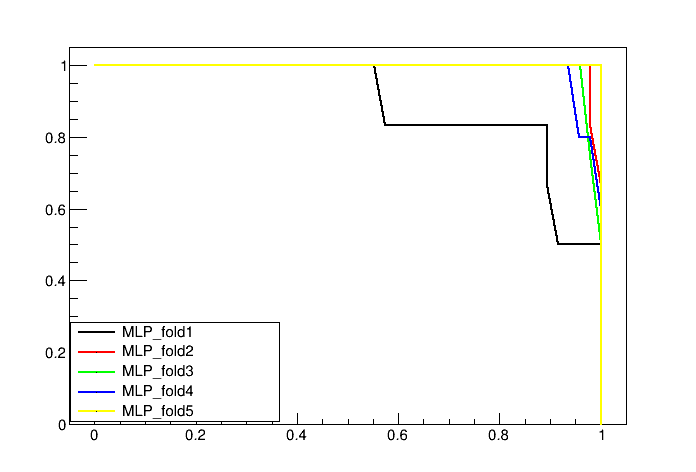

Average ROC Integral = 0.973 +/- 0.0199666


In [6]:
auto c = new TCanvas();
result.GetROCCurves()->Draw("AL");
c->BuildLegend();
c->Draw();

std::cout << "Average ROC Integral = " << result.GetROCAverage() 
          << " +/- " << result.GetROCStandardDeviation()/sqrt(cv->GetNumFolds()) << std::endl;

We can realiza that cross validation with 5 folds gives us the ideal case, followed by the 2, 3 and 4 folds methods.

In [7]:
// close outputfile to save output file
outputFile->Close();